<a href="https://colab.research.google.com/github/Indiranafa/Machine-Learning/blob/main/TG4_2341720001_INDIRA_NAFA_AURAH_HUDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PRAKTIKUM 1**

**K-Means**

In [ ]:
#Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Kebutuhan smt 5/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


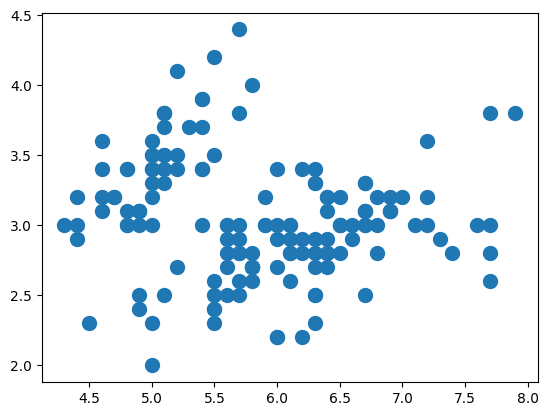

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

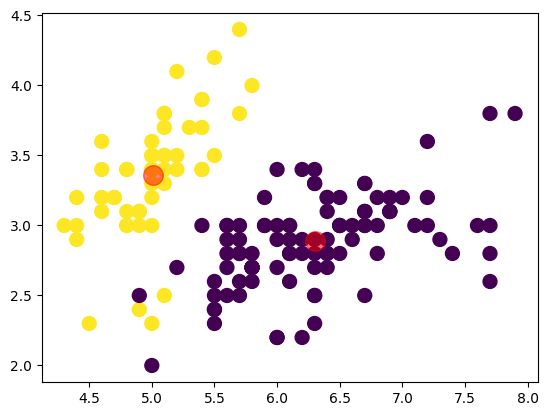

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


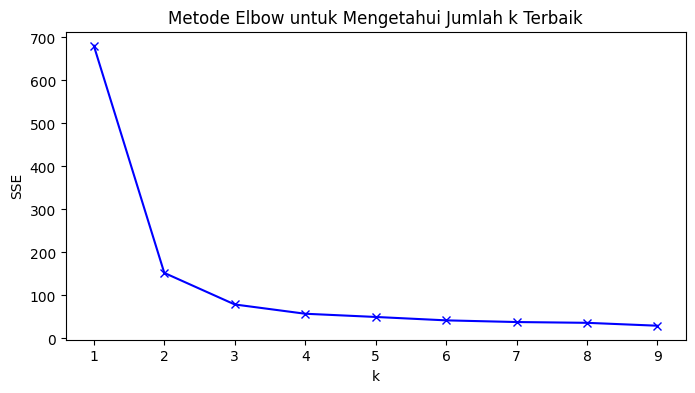

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.37175929288104
k=5; SSE=49.876430957802604
k=6; SSE=41.96482791762015
k=7; SSE=38.077402509062935
k=8; SSE=36.22903690476195
k=9; SSE=29.494450123406


**PRAKTIKUM 2**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

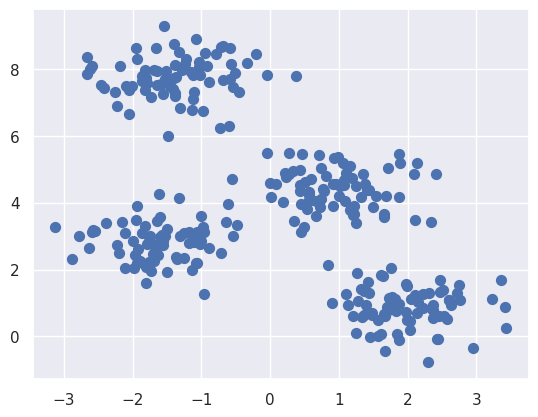

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

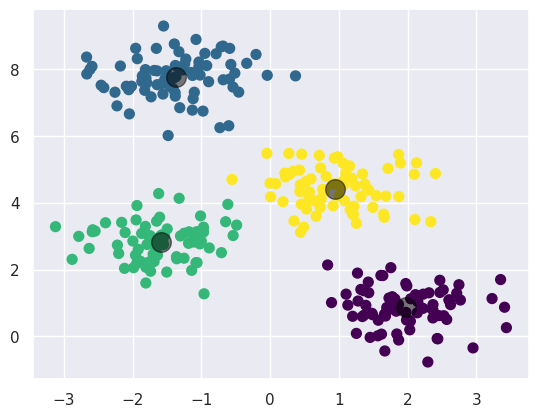

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Algoritma Expectation-Maximization

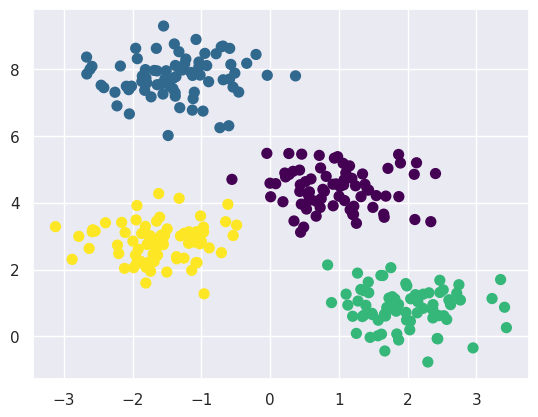

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Perubahan Random

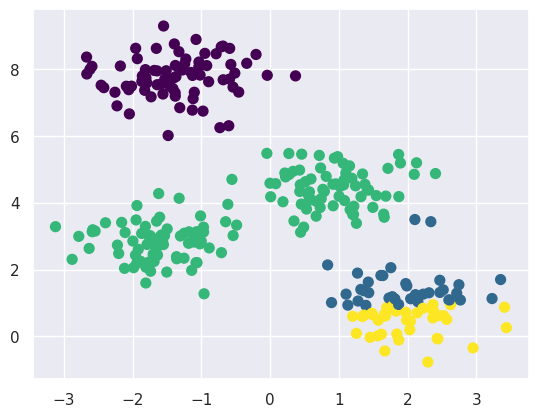

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Optimalisasi Jumlah Klaster

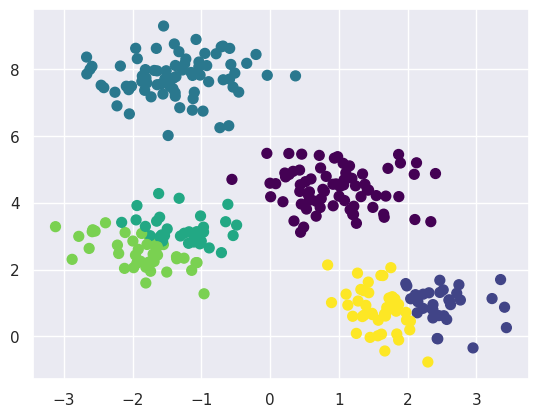

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Batas Klaster yang Tidak Selalu Linier

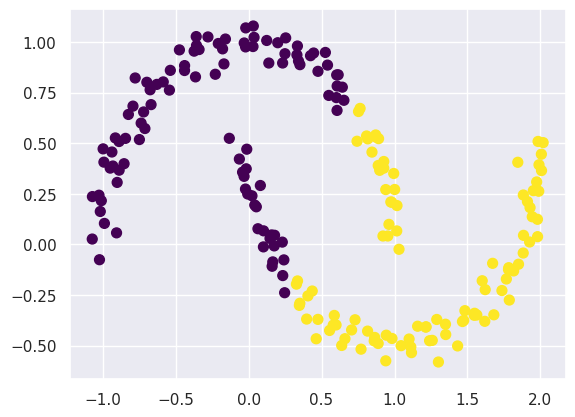

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


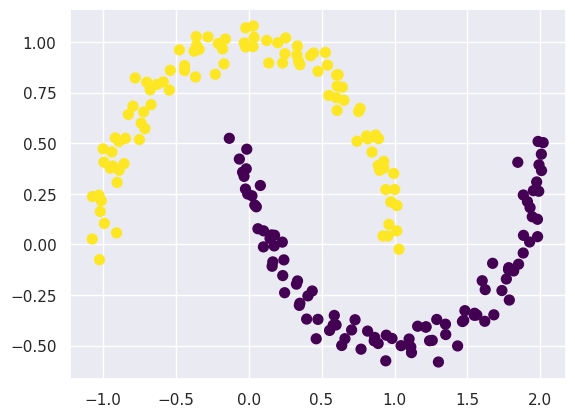

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Contoh Kasus 1: Karakter Angka

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

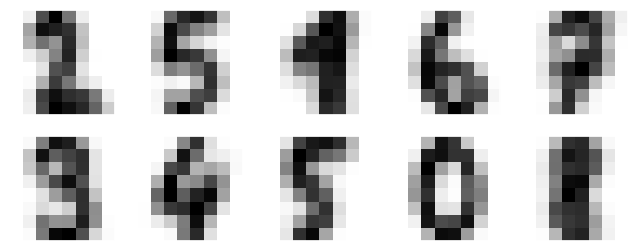

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

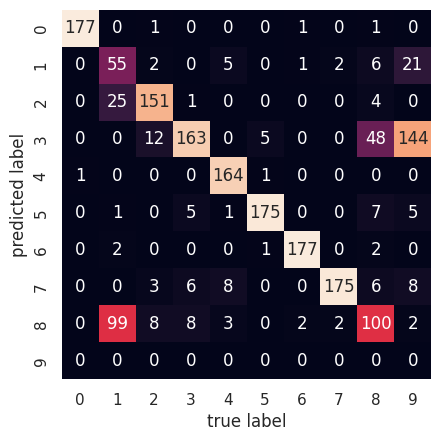

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

Studi Kasus 2: Kompresi Citra

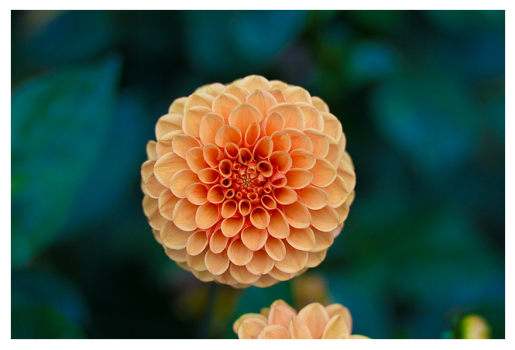

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

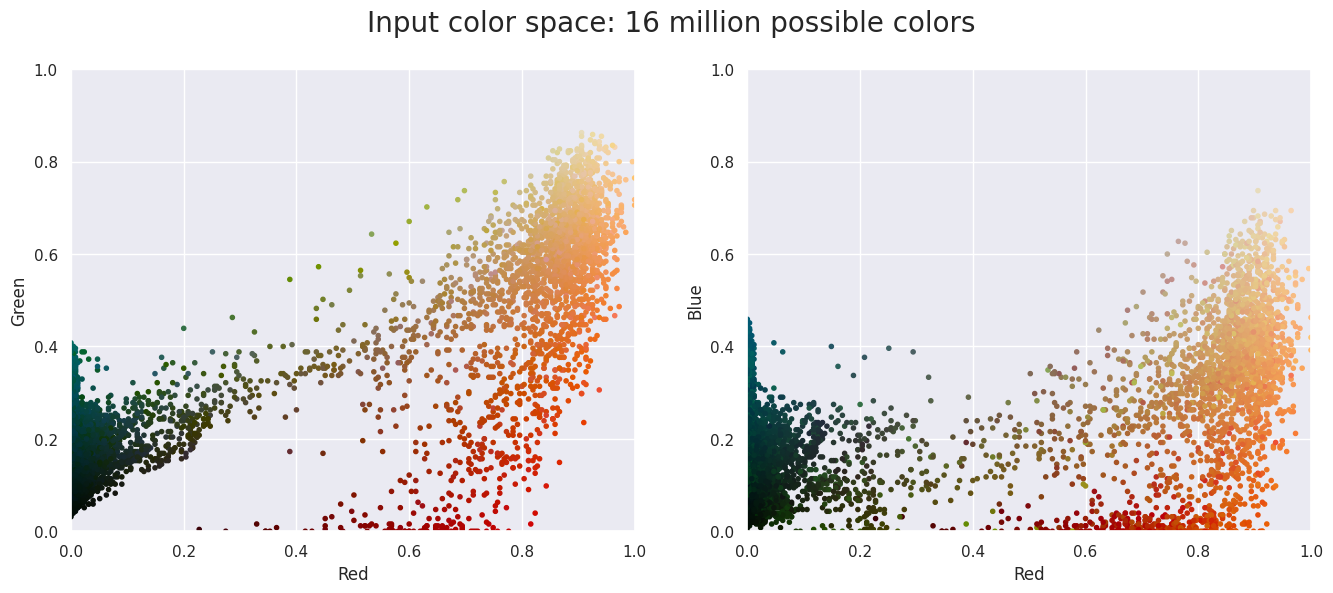

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

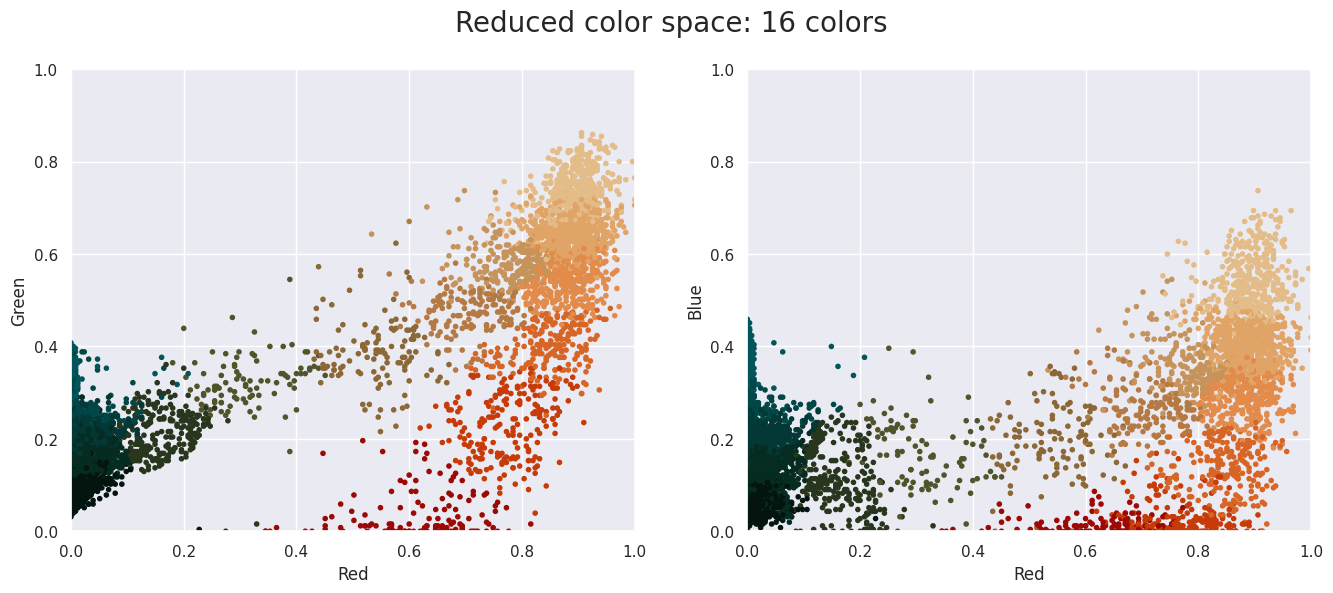

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

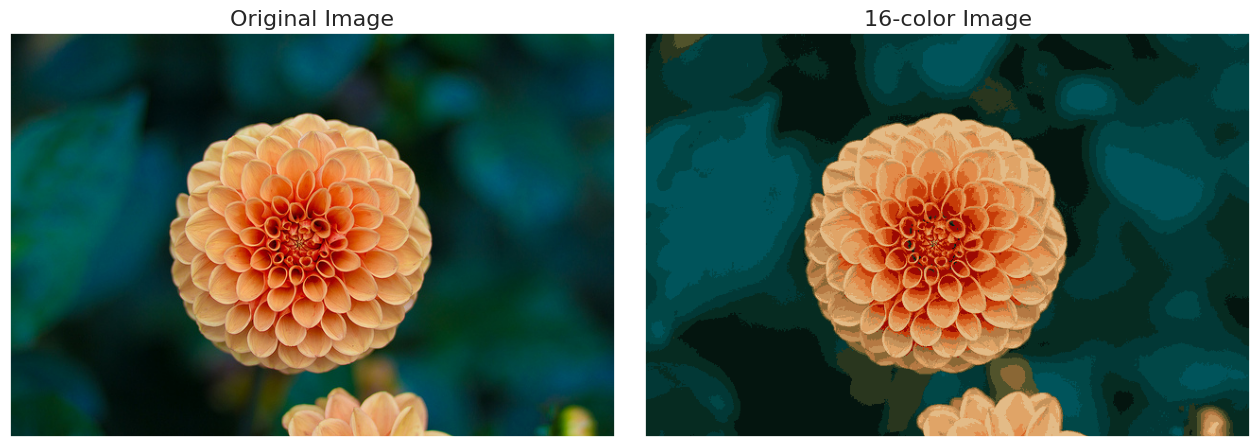

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

**PRAKTIKUM 3**

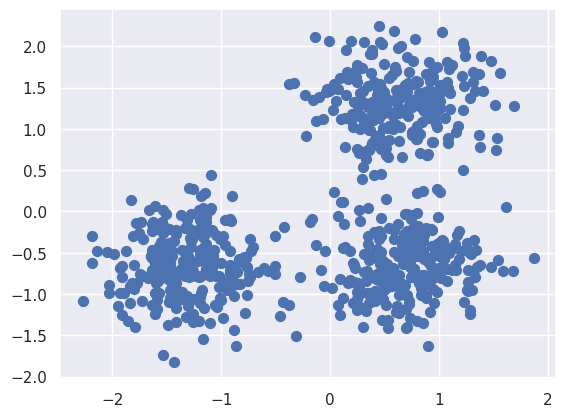

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Buat dataset blob
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Normalisasi data
X = StandardScaler().fit_transform(X)

# Visualisasi dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

Compute DBSCAN

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


Evaluasi Kualitas Klasterisasi

In [ ]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


Visualisasi Hasil Klasterisasi

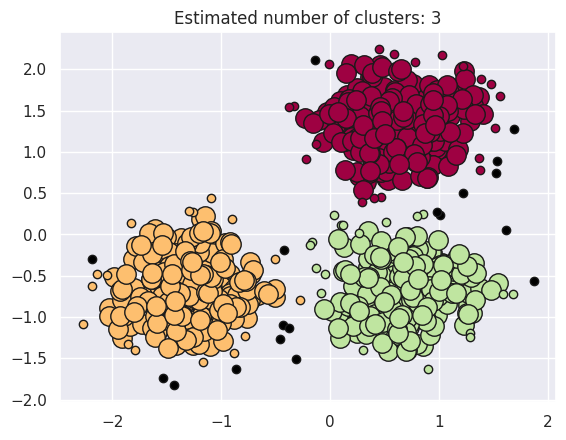

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Buat mask boolean untuk core sample
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Tentukan warna untuk tiap cluster
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Plot non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

**TUGAS PRAKTIKUM**

1. Tugas K-Means

In [ ]:
#Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Kebutuhan smt 5/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Pilih fitur Annual Income dan Spending Score
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
print(X.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


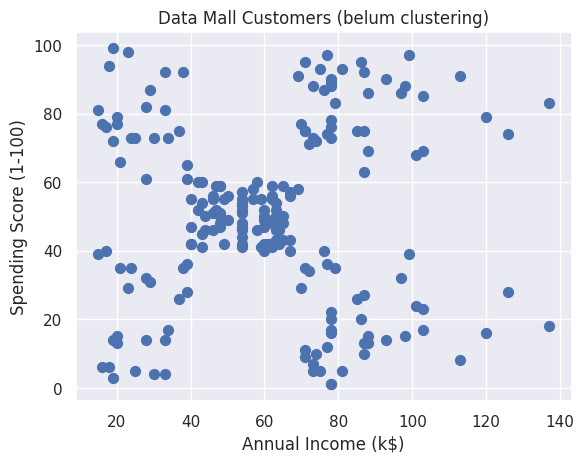

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Data Mall Customers (belum clustering)")
plt.show()

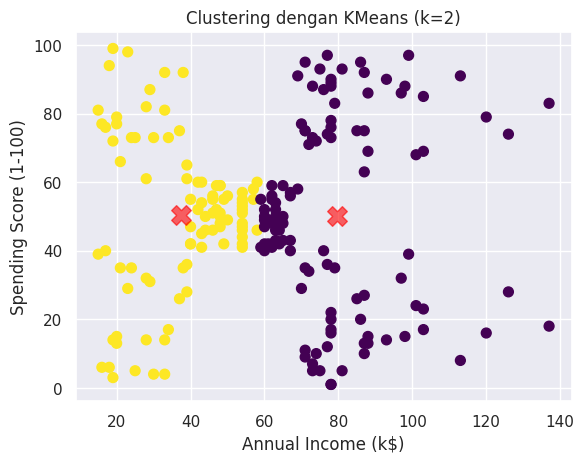

Nilai SSE (k=2): 181363.59595959607


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Visualisasi hasil clustering
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap="viridis")

# Plot centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.6, marker="X")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering dengan KMeans (k=2)")
plt.show()

# Cek nilai SSE
print(f"Nilai SSE (k=2): {kmeans.inertia_}")

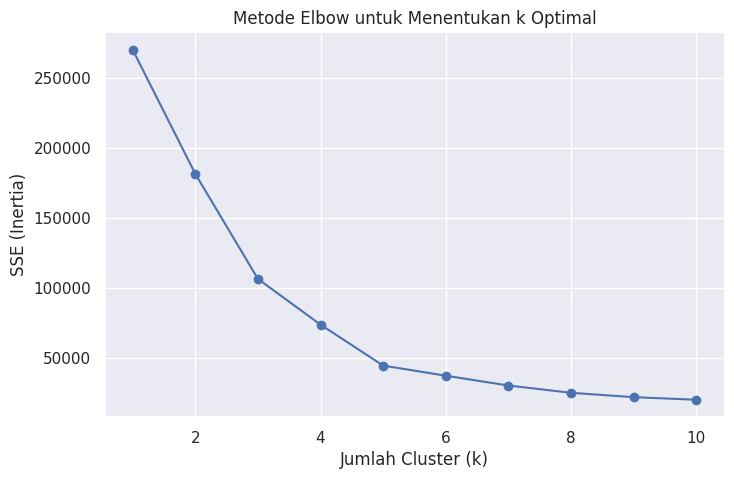

k=1; SSE=269981.28000000014
k=2; SSE=181363.59595959607
k=3; SSE=106348.37306211119
k=4; SSE=73679.78903948837
k=5; SSE=44448.45544793369
k=6; SSE=37233.81451071002
k=7; SSE=30241.34361793659
k=8; SSE=25036.417604033977
k=9; SSE=21916.79478984372
k=10; SSE=20072.070939404


In [ ]:
sse = []
K = range(1, 11)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K, sse, marker="o")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Metode Elbow untuk Menentukan k Optimal")
plt.show()

# Print nilai SSE tiap k
for idx, val in enumerate(sse, start=1):
    print(f"k={idx}; SSE={val}")

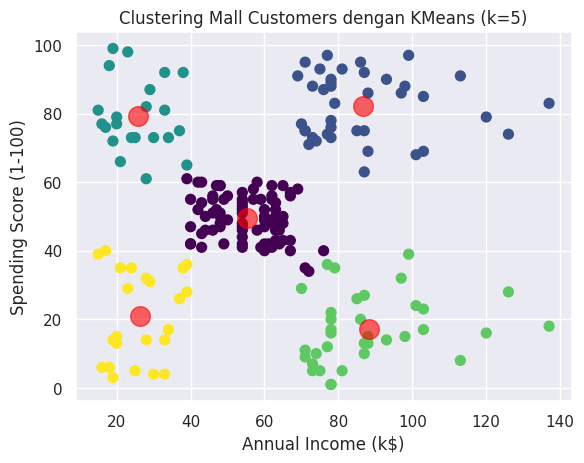

In [ ]:
# Buat model dengan k terbaik (misal k=5)
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init=10)
y_final = kmeans_final.fit_predict(X)

# Visualisasi hasil clustering final
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_final, s=50, cmap="viridis")

# Plot centroid
centers = kmeans_final.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.6, marker="o")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering Mall Customers dengan KMeans (k=5)")
plt.show()

**2. DBSCAN**

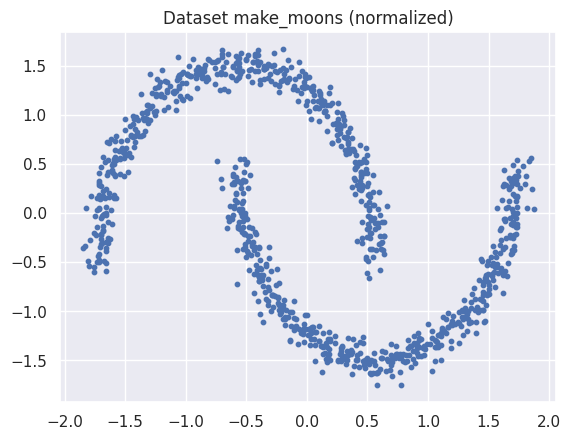

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# Buat dataset make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi
X = StandardScaler().fit_transform(X)

# Plot data awal
plt.scatter(X[:,0], X[:,1], s=10)
plt.title("Dataset make_moons (normalized)")
plt.show()

In [ ]:
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Jumlah cluster (tidak termasuk noise = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Jumlah cluster: {n_clusters}")
print(f"Jumlah noise: {n_noise}")

Jumlah cluster: 2
Jumlah noise: 0


In [ ]:
# Hanya hitung jika lebih dari 1 cluster
if n_clusters > 1:
    print("Homogeneity:", homogeneity_score(y, labels))
    print("Completeness:", completeness_score(y, labels))
    print("V-measure:", v_measure_score(y, labels))
    print("Adjusted Rand Index:", adjusted_rand_score(y, labels))
    print("Adjusted Mutual Information:", adjusted_mutual_info_score(y, labels))
    print("Silhouette Score:", silhouette_score(X, labels))
else:
    print("Hanya 1 cluster, evaluasi Silhouette tidak berlaku.")

Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
Adjusted Rand Index: 1.0
Adjusted Mutual Information: 1.0
Silhouette Score: 0.3911598537138403


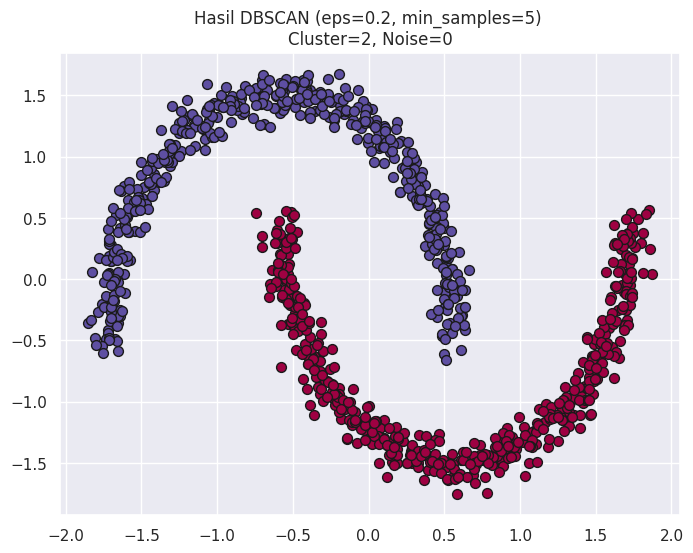

In [ ]:
# Mask untuk core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)

# Warna untuk tiap cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8,6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise berwarna hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples = titik besar
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker="o", edgecolors="k")

    # Non-core samples = titik kecil
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=20, c=[col], marker="o", edgecolors="k")

plt.title(f"Hasil DBSCAN (eps=0.2, min_samples=5) \nCluster={n_clusters}, Noise={n_noise}")
plt.show()

In [ ]:
# Daftar parameter untuk dicoba
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s).fit(X)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        print("="*50)
        print(f"eps={eps}, min_samples={min_s}")
        print(f"Jumlah cluster: {n_clusters}, Jumlah noise: {n_noise}")

        # Evaluasi (jika lebih dari 1 cluster)
        if n_clusters > 1:
            print("Homogeneity:", homogeneity_score(y, labels))
            print("Completeness:", completeness_score(y, labels))
            print("V-measure:", v_measure_score(y, labels))
            print("ARI:", adjusted_rand_score(y, labels))
            print("AMI:", adjusted_mutual_info_score(y, labels))
            print("Silhouette:", silhouette_score(X, labels))
        else:
            print("Hanya 1 cluster, evaluasi terbatas.")

eps=0.05, min_samples=3
Jumlah cluster: 69, Jumlah noise: 186
Homogeneity: 0.8155542882355717
Completeness: 0.15254831024758073
V-measure: 0.25702116445185835
ARI: 0.03004350976613907
AMI: 0.243804587789628
Silhouette: 0.11292949852882253
eps=0.05, min_samples=10
Jumlah cluster: 3, Jumlah noise: 970
Homogeneity: 0.030669398254336424
Completeness: 0.126764095870306
V-measure: 0.04938947156339281
ARI: 0.0022825509789741014
AMI: 0.0458636142209481
Silhouette: -0.29419008256642176
eps=0.05, min_samples=20
Jumlah cluster: 0, Jumlah noise: 1000
Hanya 1 cluster, evaluasi terbatas.
eps=0.1, min_samples=3
Jumlah cluster: 2, Jumlah noise: 14
Homogeneity: 0.9862068060955204
Completeness: 0.9028959083596275
V-measure: 0.9427143195619004
ARI: 0.9721793882692121
AMI: 0.942633562340455
Silhouette: 0.2516903011504368
eps=0.1, min_samples=10
Jumlah cluster: 7, Jumlah noise: 57
Homogeneity: 0.9433167874862703
Completeness: 0.4095463775841256
V-measure: 0.571132370522031
ARI: 0.5233989566001742
AMI: 0.56